In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("diabetes.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


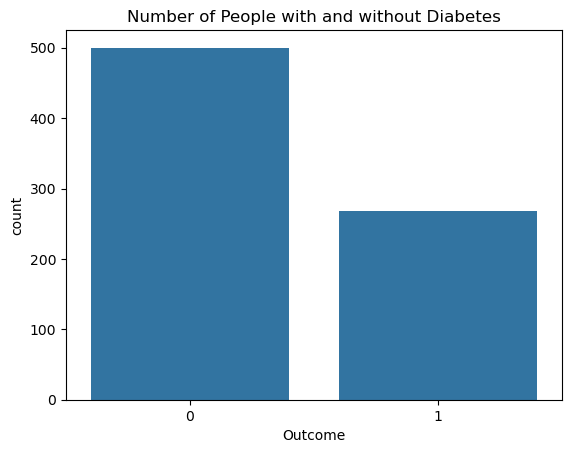

In [18]:
sns.countplot(x='Outcome', data=df)
plt.title("Number of People with and without Diabetes")
plt.show()

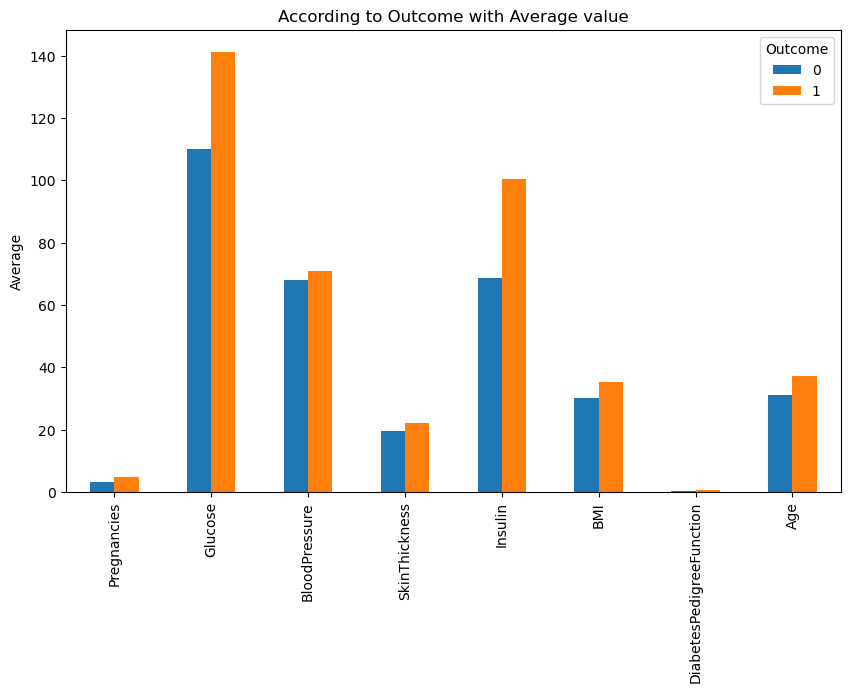

In [22]:
df.groupby('Outcome').mean().T.plot(kind='bar', figsize=(10,6))
plt.title("According to Outcome with Average value")
plt.ylabel("Average")
plt.show()

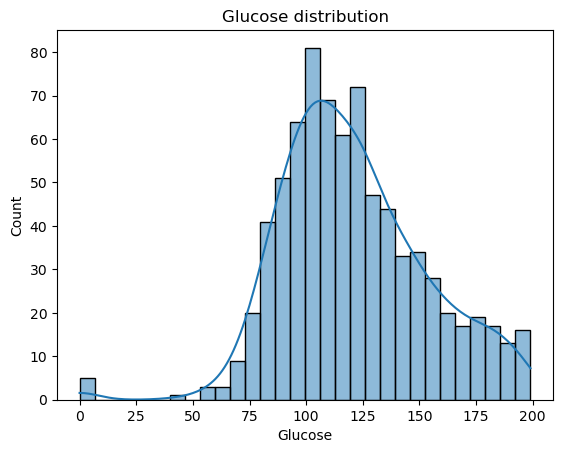

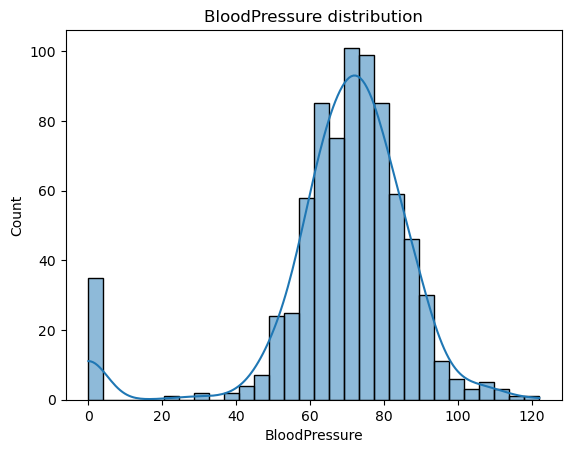

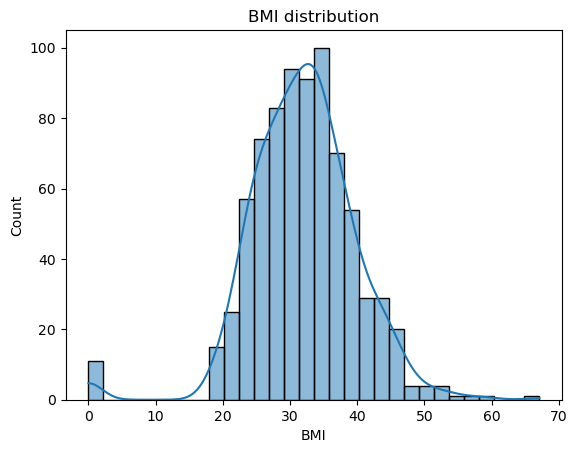

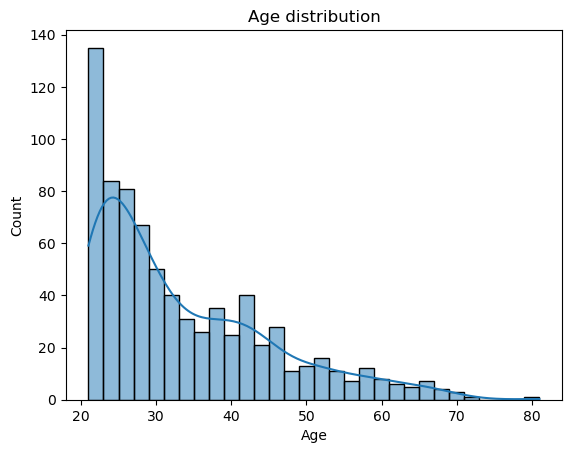

In [24]:
numerical_cols = ['Glucose','BloodPressure','BMI','Age']
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} distribution")
    plt.show()


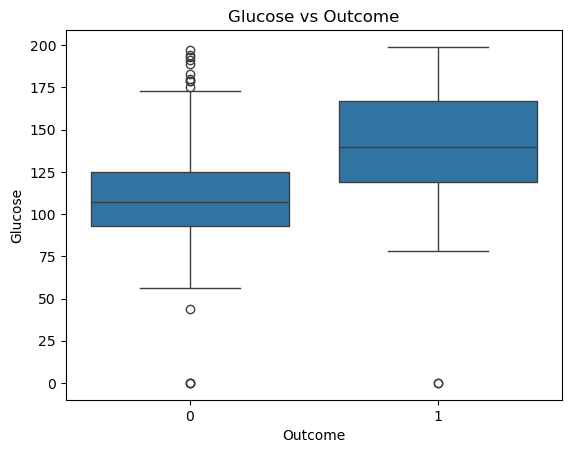

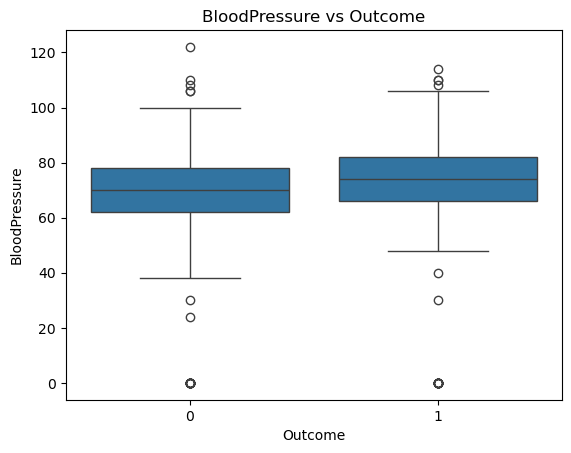

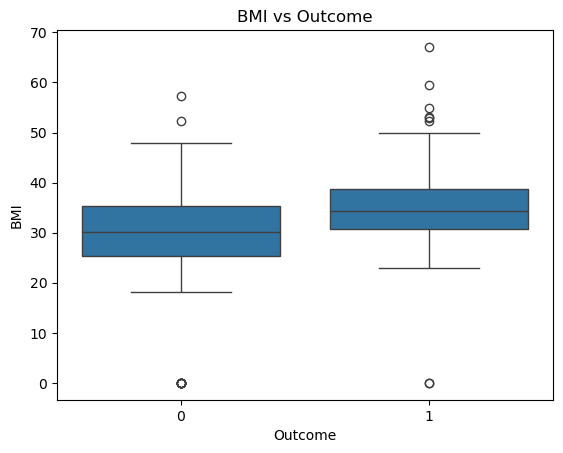

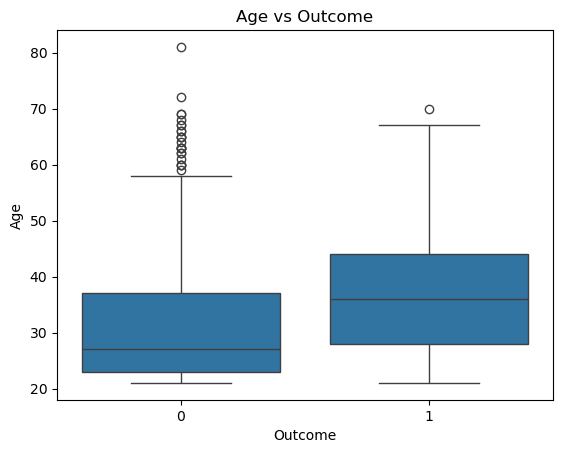

In [26]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} vs Outcome")
    plt.show()

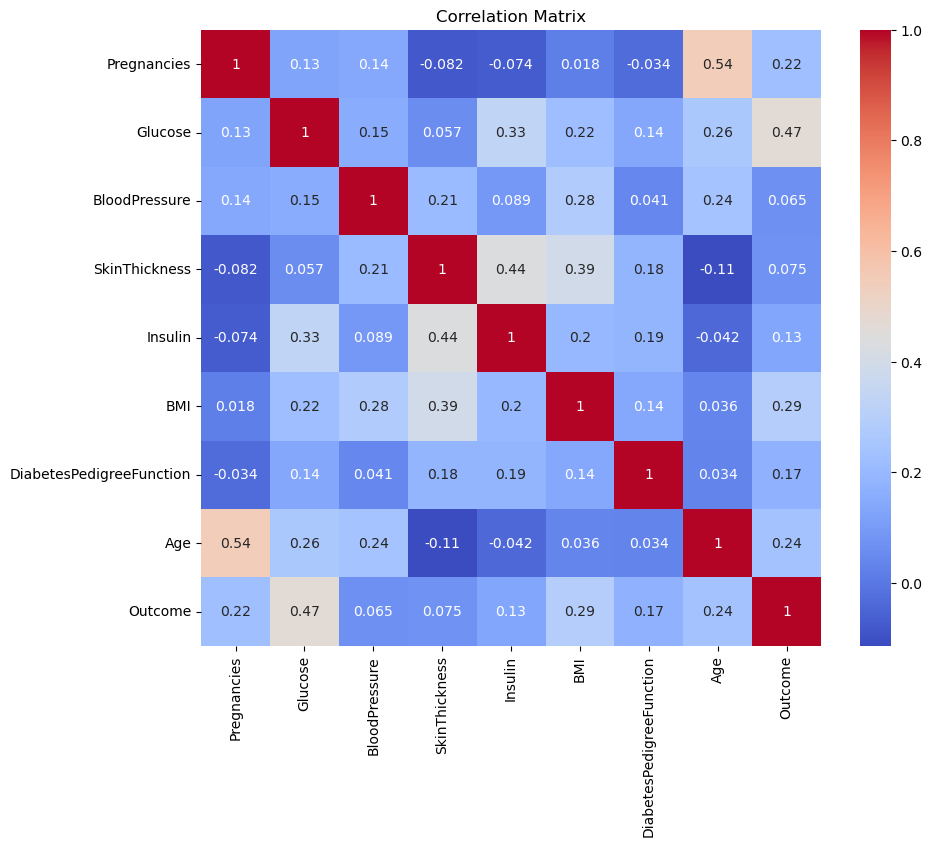

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

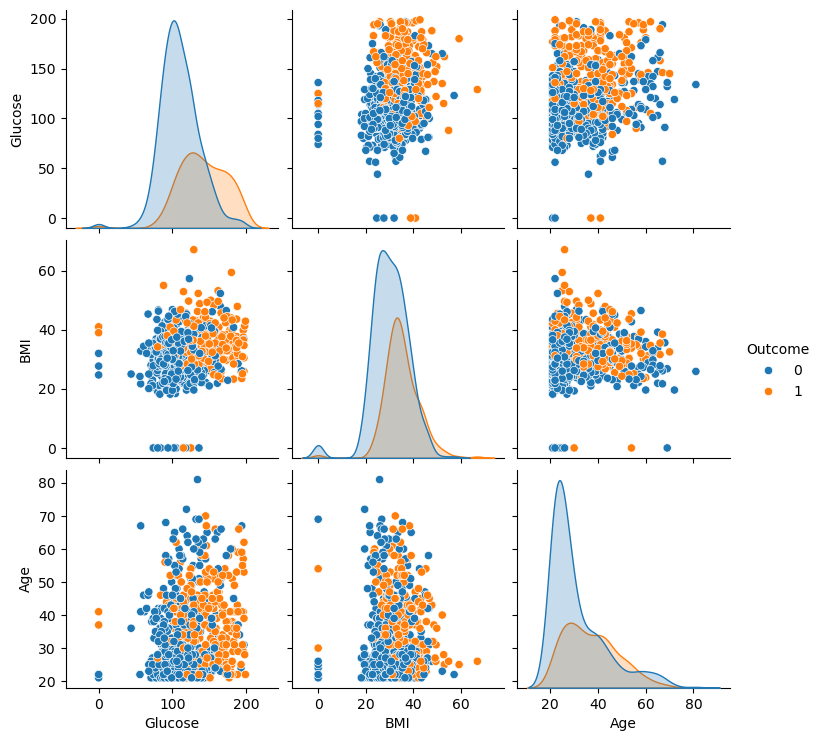

In [30]:
selected_cols = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(df[selected_cols], hue='Outcome')
plt.show()

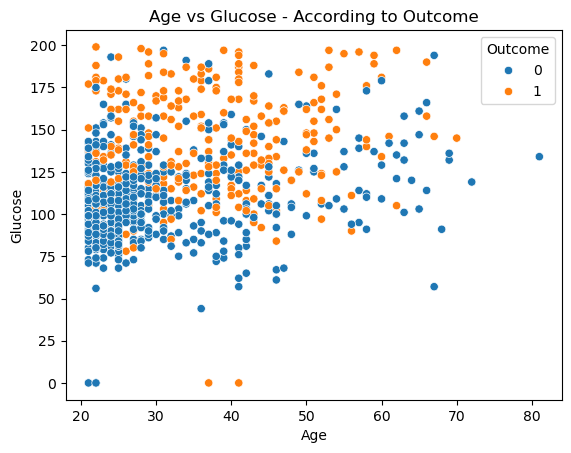

In [32]:
sns.scatterplot(data=df, x="Age", y="Glucose", hue="Outcome")
plt.title("Age vs Glucose - According to Outcome")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop("Outcome",axis=1)
y = df['Outcome']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [40]:
cols_to_fill = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

means = {}
for col in cols_to_fill:
    mean_value = X_train[X_train[col] != 0][col].mean()
    means[col] = mean_value
    X_train[col] = X_train[col].replace(0, mean_value)

for col in cols_to_fill:
    X_test[col] = X_test[col].replace(0, means[col])

In [42]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.597701,72.640545,29.058824,154.715190,32.450662,0.469948,33.285016
std,3.385438,29.971559,12.164932,8.312173,79.889875,6.862921,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.640545,29.058824,154.715190,32.400000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,154.715190,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [44]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.520288,29.391138,156.846457,32.484095,0.479565,33.064935
std,3.304818,32.320876,11.815810,10.512542,103.263579,6.946144,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.058824,154.715190,32.350000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,154.715190,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Random Forest Classifier" : RandomForestClassifier(n_estimators=100,max_depth=5),
    "Ada Boost Classifier" : AdaBoostClassifier(),
    "KNN Classifier" : KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes Classifier" : GaussianNB()
}

In [52]:
def calculate_model_metrics(true, predicted):
    score = accuracy_score(true,predicted)
    Classification_report = classification_report(true, predicted)
    matrix = confusion_matrix(true, predicted)

    return score, Classification_report, matrix

Logistic Regression for training set:
Score: 0.7817589576547231

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       392
           1       0.74      0.61      0.67       222

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614

Confusion Matrix: 
 [[345  47]
 [ 87 135]]


--------------------------------------------------
Logistic Regression for test set:
Score: 0.7467532467532467 

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.58      0.57      0.57        46

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix: 
 [[89 19]
 [20 26]]


----------------------------------

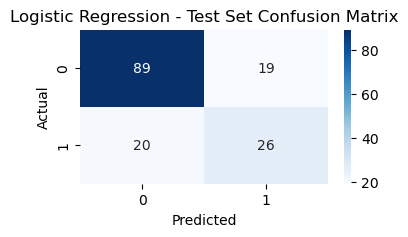

--------------------------------------------------
SVC for training set:
Score: 0.8387622149837134

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       392
           1       0.84      0.68      0.75       222

    accuracy                           0.84       614
   macro avg       0.84      0.81      0.82       614
weighted avg       0.84      0.84      0.83       614

Confusion Matrix: 
 [[363  29]
 [ 70 152]]


--------------------------------------------------
SVC for test set:
Score: 0.7142857142857143 

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       108
           1       0.52      0.52      0.52        46

    accuracy                           0.71       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix: 
 [[86 22]
 [22 24]]


---------------

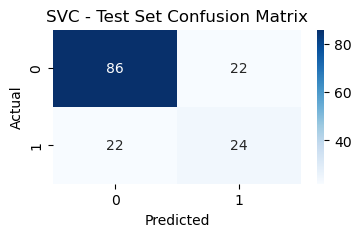

--------------------------------------------------
Random Forest Classifier for training set:
Score: 0.8680781758957655

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       392
           1       0.86      0.76      0.81       222

    accuracy                           0.87       614
   macro avg       0.87      0.84      0.85       614
weighted avg       0.87      0.87      0.87       614

Confusion Matrix: 
 [[364  28]
 [ 53 169]]


--------------------------------------------------
Random Forest Classifier for test set:
Score: 0.7207792207792207 

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       108
           1       0.53      0.54      0.54        46

    accuracy                           0.72       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.72      0.72      0.72       154

Confusion Matr

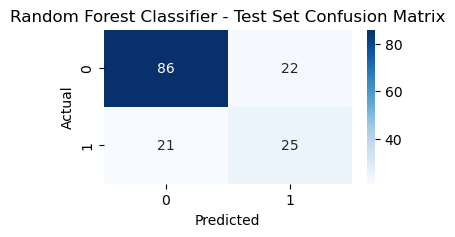

--------------------------------------------------


C:\Users\ahmet\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Classifier for training set:
Score: 0.8420195439739414

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       392
           1       0.80      0.76      0.78       222

    accuracy                           0.84       614
   macro avg       0.83      0.82      0.83       614
weighted avg       0.84      0.84      0.84       614

Confusion Matrix: 
 [[349  43]
 [ 54 168]]


--------------------------------------------------
Ada Boost Classifier for test set:
Score: 0.7532467532467533 

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       108
           1       0.58      0.61      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix: 
 [[88 20]
 [18 28]]


--------------------------------

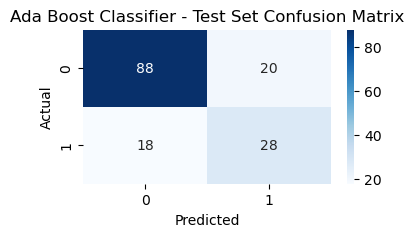

--------------------------------------------------
KNN Classifier for training set:
Score: 0.8517915309446255

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       392
           1       0.80      0.78      0.79       222

    accuracy                           0.85       614
   macro avg       0.84      0.84      0.84       614
weighted avg       0.85      0.85      0.85       614

Confusion Matrix: 
 [[350  42]
 [ 49 173]]


--------------------------------------------------
KNN Classifier for test set:
Score: 0.7142857142857143 

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       108
           1       0.52      0.57      0.54        46

    accuracy                           0.71       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.72      0.71      0.72       154

Confusion Matrix: 
 [[84 24]
 [20 

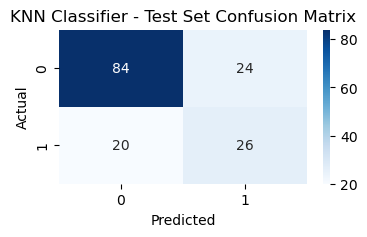

--------------------------------------------------
Naive Bayes Classifier for training set:
Score: 0.7736156351791531

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       392
           1       0.70      0.65      0.67       222

    accuracy                           0.77       614
   macro avg       0.76      0.75      0.75       614
weighted avg       0.77      0.77      0.77       614

Confusion Matrix: 
 [[331  61]
 [ 78 144]]


--------------------------------------------------
Naive Bayes Classifier for test set:
Score: 0.7142857142857143 

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       108
           1       0.52      0.57      0.54        46

    accuracy                           0.71       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.72      0.71      0.72       154

Confusion Matrix: 

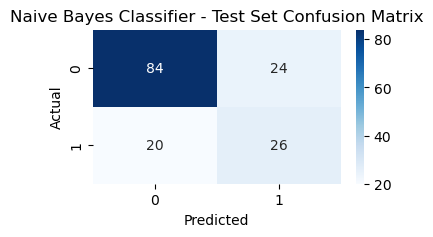

--------------------------------------------------


In [54]:
for name, model in models.items():
    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    score_train, classification_train, matrix_train = calculate_model_metrics(y_train,y_pred_train)
    score_test, classification_test, matrix_test = calculate_model_metrics(y_test,y_pred_test)

    print(f"{name} for training set:")
    print(f"Score: {score_train}\n")
    print(f"Classification Report: \n{classification_train}")
    print(f"Confusion Matrix: \n {matrix_train}")
    print("\n")
    print("-" * 50)
    
    print(f"{name} for test set:")
    print(f"Score: {score_test} \n")
    print(f"Classification Report: \n{classification_test}")
    print(f"Confusion Matrix: \n {matrix_test}")
    print("\n")
    print("-" * 50)

    plt.figure(figsize=(4,2))
    sns.heatmap(matrix_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Test Set Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-" * 50)


In [56]:
rfc_params = {
    'n_estimators' : [100, 200, 300, 500, 1000],
    'max_depth' : [5, 7, 8, 10 ,15],
    "max_features" : ["sqrt","log2", 5, 7, 10],
    'min_samples_split' : [2, 8, 12, 20]
}
ada_params = {
    "n_estimators" : [50, 70, 100, 120, 170, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}
knn_params = {
    'n_neighbors' : [5, 7, 10, 15, 20],
    'algorithm' : ['auto','scale'],
}
svc_params = {
    "kernel" : ["rbf","linear","poly"],
    "degree" : [3, 5],
    "gamma" : ["scale","auto"],
    "C": [5, 7, 10, 15, 25]
}

In [58]:
randomcv_params = [
    ('KNN Classifier', KNeighborsClassifier(), knn_params),
    ('Random Forest Classifier', RandomForestClassifier(),rfc_params),
    ('SVC Classifier', SVC(), svc_params),
    ('Ada Boost Classifier',AdaBoostClassifier(),ada_params)
]

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
for name,model,params in randomcv_params:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5,n_jobs=-1,n_iter = 20, verbose=3,scoring="accuracy")
    random.fit(X_train,y_train)
    print(f"Best parameter for {name}: {random.best_params_} \n")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter for KNN Classifier: {'n_neighbors': 5, 'algorithm': 'auto'} 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter for Random Forest Classifier: {'n_estimators': 300, 'min_samples_split': 12, 'max_features': 'sqrt', 'max_depth': 10} 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter for SVC Classifier: {'kernel': 'linear', 'gamma': 'scale', 'degree': 5, 'C': 10} 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter for Ada Boost Classifier: {'n_estimators': 70, 'learning_rate': 0.1} 



KNN Classifier for training set:
Score: 0.8338762214983714

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       392
           1       0.78      0.75      0.77       222

    accuracy                           0.83       614
   macro avg       0.82      0.82      0.82       614
weighted avg       0.83      0.83      0.83       614

Confusion Matrix: 
 [[345  47]
 [ 55 167]]


--------------------------------------------------
KNN Classifier for test set:
Score: 0.7207792207792207 

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       108
           1       0.53      0.59      0.56        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.73      0.72      0.72       154

Confusion Matrix: 
 [[84 24]
 [19 27]]


--------------------------------------------

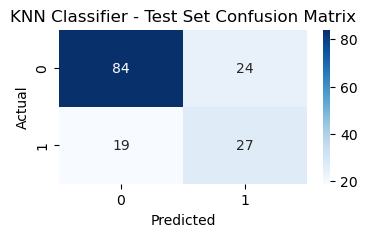

--------------------------------------------------
Random Forest Classifier for training set:
Score: 0.8680781758957655

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       392
           1       0.84      0.78      0.81       222

    accuracy                           0.87       614
   macro avg       0.86      0.85      0.85       614
weighted avg       0.87      0.87      0.87       614

Confusion Matrix: 
 [[359  33]
 [ 48 174]]


--------------------------------------------------
Random Forest Classifier for test set:
Score: 0.7142857142857143 

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       108
           1       0.52      0.54      0.53        46

    accuracy                           0.71       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.72      0.71      0.72       154

Confusion Matr

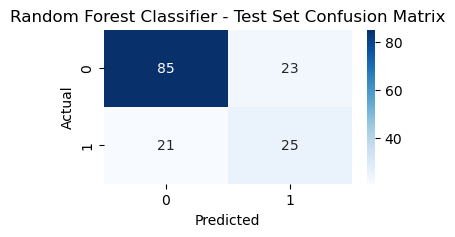

--------------------------------------------------
SVC Classifier for training set:
Score: 0.7801302931596091

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       392
           1       0.74      0.60      0.67       222

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.77       614

Confusion Matrix: 
 [[345  47]
 [ 88 134]]


--------------------------------------------------
SVC Classifier for test set:
Score: 0.7467532467532467 

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       108
           1       0.58      0.54      0.56        46

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.74      0.75      0.74       154

Confusion Matrix: 
 [[90 18]
 [21 

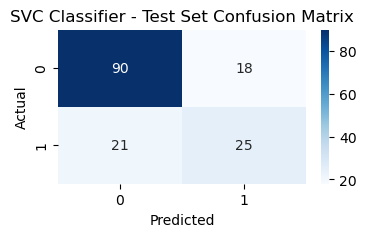

--------------------------------------------------
Ada Boost Classifier for training set:
Score: 0.8175895765472313

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       392
           1       0.78      0.69      0.73       222

    accuracy                           0.82       614
   macro avg       0.81      0.79      0.80       614
weighted avg       0.82      0.82      0.81       614

Confusion Matrix: 
 [[349  43]
 [ 69 153]]


--------------------------------------------------
Ada Boost Classifier for test set:
Score: 0.7467532467532467 

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       108
           1       0.57      0.61      0.59        46

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix: 
 [[

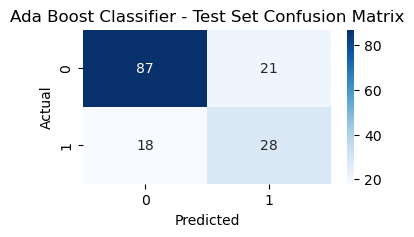

--------------------------------------------------


In [65]:
models = {
    "KNN Classifier" : KNeighborsClassifier(n_neighbors=5,algorithm="auto"),
    "Random Forest Classifier" : RandomForestClassifier(n_estimators=300, min_samples_split=12, max_features="log2", max_depth=5),
    "SVC Classifier" : SVC(kernel="linear",gamma='scale', degree=3, C=10),
    "Ada Boost Classifier" : AdaBoostClassifier(n_estimators=170, learning_rate=0.1)
}
for name, model in models.items():
    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    score_train, classification_train, matrix_train = calculate_model_metrics(y_train,y_pred_train)
    score_test, classification_test, matrix_test = calculate_model_metrics(y_test,y_pred_test)

    print(f"{name} for training set:")
    print(f"Score: {score_train}\n")
    print(f"Classification Report: \n{classification_train}")
    print(f"Confusion Matrix: \n {matrix_train}")
    print("\n")
    print("-" * 50)
    
    print(f"{name} for test set:")
    print(f"Score: {score_test} \n")
    print(f"Classification Report: \n{classification_test}")
    print(f"Confusion Matrix: \n {matrix_test}")
    print("\n")
    print("-" * 50)

    plt.figure(figsize=(4,2))
    sns.heatmap(matrix_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Test Set Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-" * 50)
